In [1]:
from viresclient import SwarmRequest
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

request = SwarmRequest()

## Check what "MAG" data variables are available

In [2]:
request.available_measurements("MAG")

['F',
 'dF_AOCS',
 'dF_other',
 'F_error',
 'B_VFM',
 'B_NEC',
 'dB_Sun',
 'dB_AOCS',
 'dB_other',
 'B_error',
 'q_NEC_CRF',
 'Att_error',
 'Flags_F',
 'Flags_B',
 'Flags_q',
 'Flags_Platform',
 'ASM_Freq_Dev']

## Check the names of available models

In [3]:
request.available_models(details=False)

['IGRF12',
 'SIFM',
 'CHAOS-6-Combined',
 'CHAOS-6-Core',
 'CHAOS-6-Static',
 'CHAOS-6-MMA-Primary',
 'CHAOS-6-MMA-Secondary',
 'MCO_SHA_2C',
 'MCO_SHA_2D',
 'MCO_SHA_2F',
 'MLI_SHA_2C',
 'MLI_SHA_2D',
 'MMA_SHA_2C-Primary',
 'MMA_SHA_2C-Secondary',
 'MMA_SHA_2F-Primary',
 'MMA_SHA_2F-Secondary',
 'MIO_SHA_2C-Primary',
 'MIO_SHA_2C-Secondary',
 'MIO_SHA_2D-Primary',
 'MIO_SHA_2D-Secondary']

## Get some MAG data and models, at 10-second sampling

In [4]:
request.set_collection("SW_OPER_MAGA_LR_1B")

request.set_products(
    measurements=["F", "B_NEC"],
    models=["CHAOS-6-Core", "MCO_SHA_2D"],
    sampling_step="PT10S"
)

## Fetch just one hour of data

In [5]:
data = request.get_between(
    # 2014-01-01 00:00:00
    start_time = dt.datetime(2014,1,1, 0),
    # 2014-01-01 01:00:00
    end_time = dt.datetime(2014,1,1, 1)
)

[1/1] Processing:  100%|██████████|  [ Elapsed: 00:01, Remaining: 00:00 ]
      Downloading: 100%|██████████|  [ Elapsed: 00:00, Remaining: 00:00 ] (0.098MB)


## See a list of the input files

In [6]:
data.sources

['SW_OPER_MAGA_LR_1B_20140101T000000_20140101T235959_0505_MDR_MAG_LR',
 'SW_OPER_MCO_SHA_2D_20131126T000000_20180101T000000_0401',
 'SW_OPER_MCO_SHA_2X_19970101T000000_20190911T235959_0609']

## Transfer data to a pandas dataframe:

In [7]:
df = data.as_dataframe()
df.head()

,Spacecraft,Latitude,Longitude,Radius,F,F_CHAOS-6-Core,F_MCO_SHA_2D,B_NEC,B_NEC_CHAOS-6-Core,B_NEC_MCO_SHA_2D
2014-01-01 00:00:00,A,-1.228938,-14.116674,6878309.22,22867.5503,22873.822546,22874.211509,"[20103.5246, -4126.2621, -10086.988800000001]","[20112.785007695795, -4126.645358999291, -1008...","[20113.62392147383, -4127.463956127047, -10081..."
2014-01-01 00:00:10,A,-1.862521,-14.131424,6878381.17,22814.5656,22820.559419,22820.941425,"[19815.0914, -4160.9933, -10514.4074]","[19824.30336435636, -4162.293827406956, -10509...","[19825.16184358055, -4163.127549318375, -10508..."
2014-01-01 00:00:20,A,-2.496090,-14.146155,6878452.05,22763.2585,22768.991185,22769.369161,"[19523.4946, -4195.196800000001, -10926.966400...","[19532.6740505881, -4196.681100594604, -10921....","[19533.553905492434, -4197.529053749354, -1092..."
2014-01-01 00:00:30,A,-3.129644,-14.160861,6878521.87,22713.3703,22718.861531,22719.238240,"[19229.2386, -4228.4747, -11324.8335]","[19238.44099511634, -4229.740544612953, -11319...","[19239.343572344795, -4230.60181901415, -11318..."
2014-01-01 00:00:40,A,-3.763184,-14.175534,6878590.61,22664.7202,22669.926715,22670.304681,"[18932.8807, -4260.8424, -11708.0897]","[18942.149013902937, -4261.4069571543305, -117...","[18943.075143502585, -4262.280633762369, -1170..."


Use `expand=True` to extract vectors (B_NEC...) as separate columns (..._N, ..._E, ..._C)

In [8]:
df = data.as_dataframe(expand=True)
df.head()

,Spacecraft,Latitude,Longitude,Radius,F,F_CHAOS-6-Core,F_MCO_SHA_2D,B_NEC_N,B_NEC_E,B_NEC_C,B_NEC_CHAOS-6-Core_N,B_NEC_CHAOS-6-Core_E,B_NEC_CHAOS-6-Core_C,B_NEC_MCO_SHA_2D_N,B_NEC_MCO_SHA_2D_E,B_NEC_MCO_SHA_2D_C
2014-01-01 00:00:00,A,-1.228938,-14.116674,6878309.22,22867.5503,22873.822546,22874.211509,20103.5246,-4126.2621,-10086.9888,20112.785008,-4126.645359,-10082.580780,20113.623921,-4127.463956,-10081.454567
2014-01-01 00:00:10,A,-1.862521,-14.131424,6878381.17,22814.5656,22820.559419,22820.941425,19815.0914,-4160.9933,-10514.4074,19824.303364,-4162.293827,-10509.530837,19825.161844,-4163.127549,-10508.410652
2014-01-01 00:00:20,A,-2.496090,-14.146155,6878452.05,22763.2585,22768.991185,22769.369161,19523.4946,-4195.1968,-10926.9664,19532.674051,-4196.681101,-10921.971972,19533.553905,-4197.529054,-10920.860481
2014-01-01 00:00:30,A,-3.129644,-14.160861,6878521.87,22713.3703,22718.861531,22719.238240,19229.2386,-4228.4747,-11324.8335,19238.440995,-4229.740545,-11319.821213,19239.343572,-4230.601819,-11318.721366
2014-01-01 00:00:40,A,-3.763184,-14.175534,6878590.61,22664.7202,22669.926715,22670.304681,18932.8807,-4260.8424,-11708.0897,18942.149014,-4261.406957,-11703.032886,18943.075144,-4262.280634,-11701.947796


## ... Or to an xarray Dataset:

In [9]:
ds = data.as_xarray()
ds

<xarray.Dataset>
Dimensions:             (Timestamp: 360, dim: 3)
Coordinates:
  * Timestamp           (Timestamp) datetime64[ns] 2014-01-01 ... 2014-01-01T00:59:50
Dimensions without coordinates: dim
Data variables:
    Spacecraft          (Timestamp) <U1 'A' 'A' 'A' 'A' 'A' ... 'A' 'A' 'A' 'A'
    Latitude            (Timestamp) float64 -1.229 -1.863 -2.496 ... 48.14 48.77
    Longitude           (Timestamp) float64 -14.12 -14.13 -14.15 ... 153.6 153.6
    Radius              (Timestamp) float64 6.878e+06 6.878e+06 ... 6.868e+06
    F                   (Timestamp) float64 2.287e+04 2.281e+04 ... 4.021e+04
    F_CHAOS-6-Core      (Timestamp) float64 2.287e+04 2.282e+04 ... 4.02e+04
    F_MCO_SHA_2D        (Timestamp) float64 2.287e+04 2.282e+04 ... 4.021e+04
    B_NEC               (Timestamp, dim) float64 2.01e+04 ... 3.558e+04
    B_NEC_CHAOS-6-Core  (Timestamp, dim) float64 2.011e+04 ... 3.557e+04
    B_NEC_MCO_SHA_2D    (Timestamp, dim) float64 2.011e+04 ... 3.557e+04
Attributes:


In [10]:
ds.Sources

['SW_OPER_MAGA_LR_1B_20140101T000000_20140101T235959_0505_MDR_MAG_LR',
 'SW_OPER_MCO_SHA_2D_20131126T000000_20180101T000000_0401',
 'SW_OPER_MCO_SHA_2X_19970101T000000_20190911T235959_0609']

## Instead, fetch the residuals directly

Adding `residuals=True` to `.set_products()` will instead directly evaluate and return all data-model residuals

In [11]:
request = SwarmRequest()
request.set_collection("SW_OPER_MAGA_LR_1B")
request.set_products(
    measurements=["F", "B_NEC"],
    models=["CHAOS-6-Core", "MCO_SHA_2D"],
    residuals=True,
    sampling_step="PT10S"
)
data = request.get_between(
    start_time = dt.datetime(2014,1,1, 0),
    end_time = dt.datetime(2014,1,1, 1)
)
df = data.as_dataframe(expand=True)
df.head()

[1/1] Processing:  100%|██████████|  [ Elapsed: 00:01, Remaining: 00:00 ]
      Downloading: 100%|██████████|  [ Elapsed: 00:00, Remaining: 00:00 ] (0.081MB)


,Spacecraft,Latitude,Longitude,Radius,F_res_CHAOS-6-Core,F_res_MCO_SHA_2D,B_NEC_res_CHAOS-6-Core_N,B_NEC_res_CHAOS-6-Core_E,B_NEC_res_CHAOS-6-Core_C,B_NEC_res_MCO_SHA_2D_N,B_NEC_res_MCO_SHA_2D_E,B_NEC_res_MCO_SHA_2D_C
2014-01-01 00:00:00,A,-1.228938,-14.116674,6878309.22,-6.272246,-6.661209,-9.260408,0.383259,-4.408020,-10.099321,1.201856,-5.534233
2014-01-01 00:00:10,A,-1.862521,-14.131424,6878381.17,-5.993819,-6.375825,-9.211964,1.300527,-4.876563,-10.070444,2.134249,-5.996748
2014-01-01 00:00:20,A,-2.496090,-14.146155,6878452.05,-5.732685,-6.110661,-9.179451,1.484301,-4.994428,-10.059305,2.332254,-6.105919
2014-01-01 00:00:30,A,-3.129644,-14.160861,6878521.87,-5.491231,-5.867940,-9.202395,1.265845,-5.012287,-10.104972,2.127119,-6.112134
2014-01-01 00:00:40,A,-3.763184,-14.175534,6878590.61,-5.206515,-5.584481,-9.268314,0.564557,-5.056814,-10.194444,1.438234,-6.141904


## Plot the scalar residuals for each model

### using the pandas method:

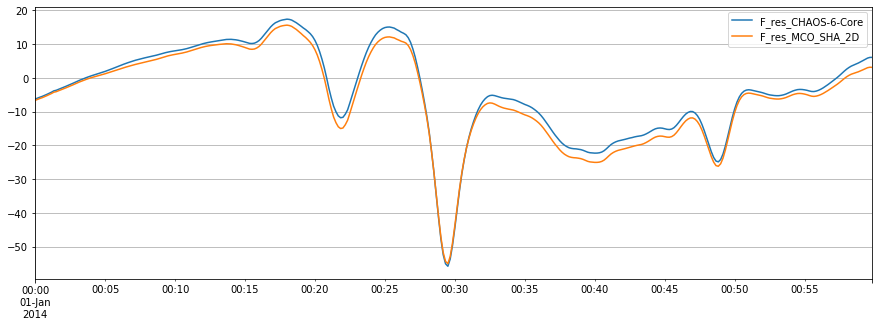

In [12]:
df.plot(
    y=["F_res_CHAOS-6-Core", "F_res_MCO_SHA_2D"],
    figsize=(15,5),
    grid=True
);

### using matplotlib interface (Matlab-style)

NB: we are doing `plt.plot(x, y)` with `x` as `df.index` (the time-based index of df), and `y` as `df[".."]`

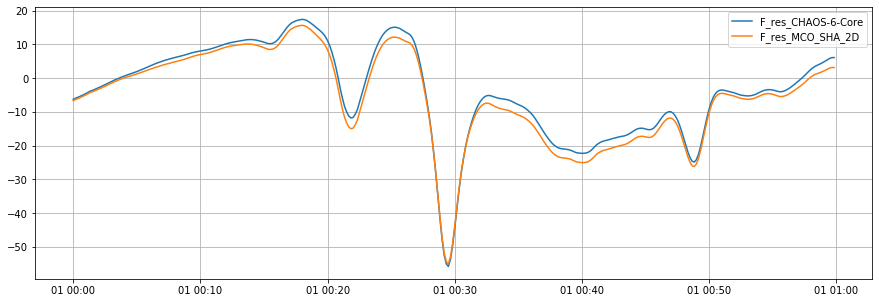

In [13]:
plt.figure(figsize=(15,5))
plt.plot(
    df.index,
    df["F_res_CHAOS-6-Core"],
    label="F_res_CHAOS-6-Core"
)
plt.plot(
    df.index,
    df["F_res_MCO_SHA_2D"],
    label="F_res_MCO_SHA_2D"
)
plt.grid()
plt.legend();

### using matplotlib interface (Object Oriented style)

This is the recommended route for making more complicated figures than direct pandas methods allow

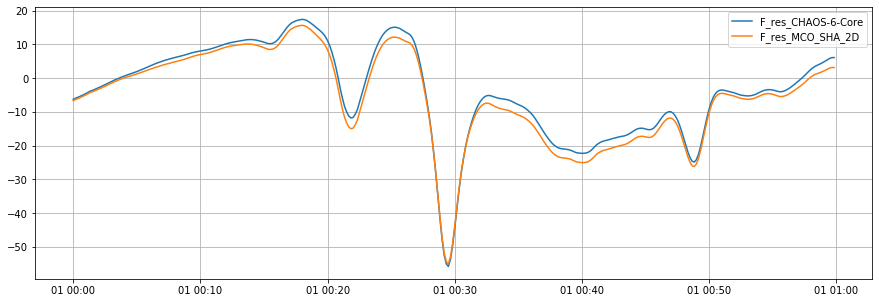

In [14]:
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(
    df.index,
    df["F_res_CHAOS-6-Core"],
    label="F_res_CHAOS-6-Core"
)
ax.plot(
    df.index,
    df["F_res_MCO_SHA_2D"],
    label="F_res_MCO_SHA_2D"
)
ax.grid()
ax.legend();

## Showing the B_NEC components

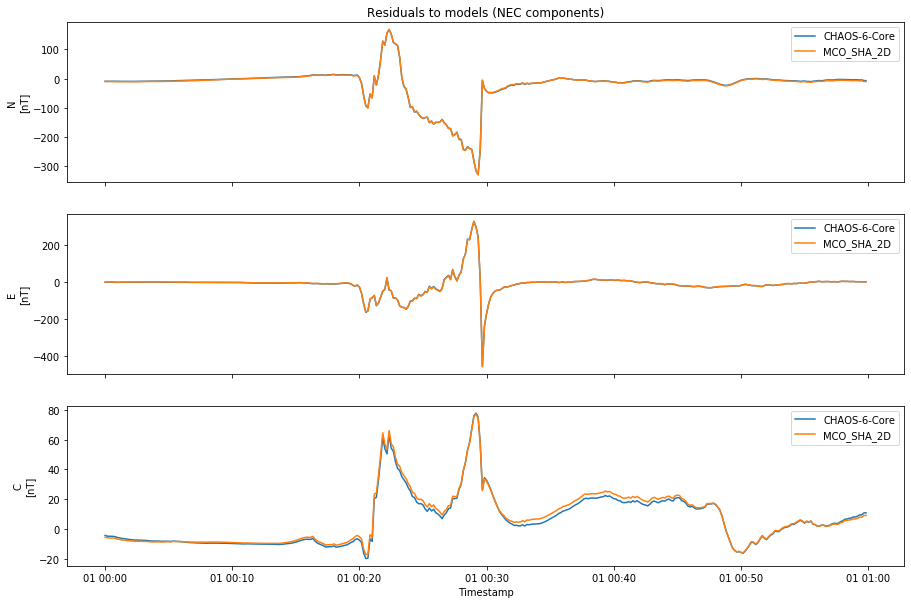

In [15]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15,10), sharex=True)
for component, ax in zip("NEC", axes):
    for model_name in ("CHAOS-6-Core", "MCO_SHA_2D"):
        ax.plot(
            df.index,
            df[f"B_NEC_res_{model_name}_{component}"],
            label=model_name
        )
    ax.set_ylabel(f"{component}\n[nT]")
    ax.legend()
axes[0].set_title("Residuals to models (NEC components)")
axes[2].set_xlabel("Timestamp");

## Similar plotting, using the data via xarray instead

In [16]:
ds = data.as_xarray()
ds

<xarray.Dataset>
Dimensions:                 (Timestamp: 360, dim: 3)
Coordinates:
  * Timestamp               (Timestamp) datetime64[ns] 2014-01-01 ... 2014-01-01T00:59:50
Dimensions without coordinates: dim
Data variables:
    Spacecraft              (Timestamp) <U1 'A' 'A' 'A' 'A' ... 'A' 'A' 'A' 'A'
    Latitude                (Timestamp) float64 -1.229 -1.863 ... 48.14 48.77
    Longitude               (Timestamp) float64 -14.12 -14.13 ... 153.6 153.6
    Radius                  (Timestamp) float64 6.878e+06 ... 6.868e+06
    F_res_CHAOS-6-Core      (Timestamp) float64 -6.272 -5.994 ... 6.062 6.072
    F_res_MCO_SHA_2D        (Timestamp) float64 -6.661 -6.376 ... 3.153 3.108
    B_NEC_res_CHAOS-6-Core  (Timestamp, dim) float64 -9.26 0.3833 ... 10.78
    B_NEC_res_MCO_SHA_2D    (Timestamp, dim) float64 -10.1 1.202 ... 2.782 8.984
Attributes:
    Sources:         ['SW_OPER_MAGA_LR_1B_20140101T000000_20140101T235959_050...
    MagneticModels:  ["CHAOS-6-Core = 'CHAOS-6-Core'(max_degr

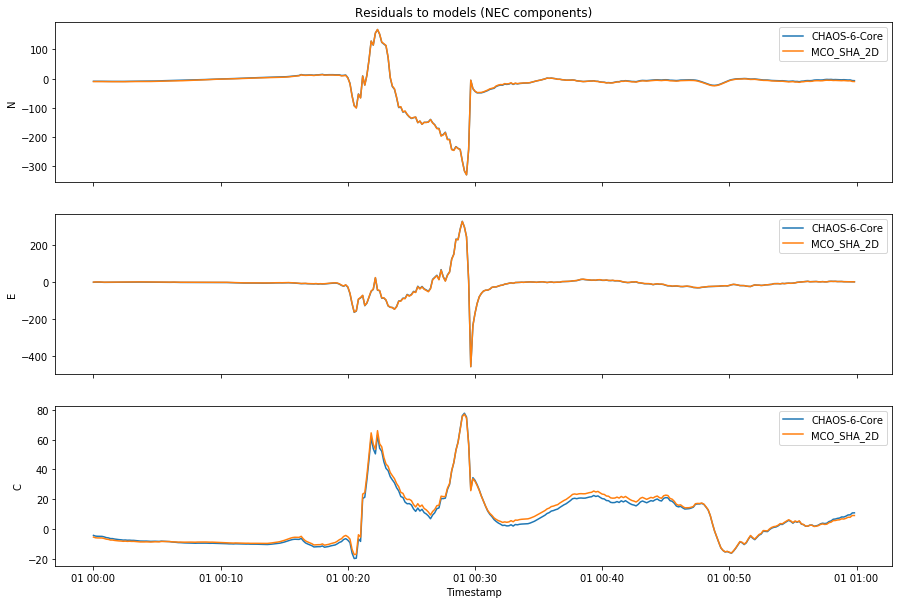

In [17]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15,10), sharex=True)
for i, ax in enumerate(axes):
    for model_name in ("CHAOS-6-Core", "MCO_SHA_2D"):
        ax.plot(
            ds["Timestamp"],
            ds[f"B_NEC_res_{model_name}"][:, i],
            label=model_name
        )
    ax.set_ylabel("NEC"[i])
    ax.legend()
axes[0].set_title("Residuals to models (NEC components)")
axes[2].set_xlabel("Timestamp");

## Access multiple MAG datasets simultaneously

Differentiate between them using the "Spacecraft" column

In [18]:
request = SwarmRequest()
request.set_collection("SW_OPER_MAGA_LR_1B", "SW_OPER_MAGC_LR_1B")
request.set_products(
    measurements=["F", "B_NEC"],
    models=["CHAOS-6-Core",],
    residuals=True,
    sampling_step="PT10S"
)
data = request.get_between(
    start_time = dt.datetime(2014,1,1, 0),
    end_time = dt.datetime(2014,1,1, 1)
)
df = data.as_dataframe(expand=True)
df.head()

[1/1] Processing:  100%|██████████|  [ Elapsed: 00:01, Remaining: 00:00 ]
      Downloading: 100%|██████████|  [ Elapsed: 00:00, Remaining: 00:00 ] (0.072MB)


,Spacecraft,Latitude,Longitude,Radius,F_res_CHAOS-6-Core,B_NEC_res_CHAOS-6-Core_N,B_NEC_res_CHAOS-6-Core_E,B_NEC_res_CHAOS-6-Core_C
2014-01-01 00:00:00,A,-1.228938,-14.116674,6878309.22,-6.272246,-9.260408,0.383259,-4.408020
2014-01-01 00:00:10,A,-1.862521,-14.131424,6878381.17,-5.993819,-9.211964,1.300527,-4.876563
2014-01-01 00:00:20,A,-2.496090,-14.146155,6878452.05,-5.732685,-9.179451,1.484301,-4.994428
2014-01-01 00:00:30,A,-3.129644,-14.160861,6878521.87,-5.491231,-9.202395,1.265845,-5.012287
2014-01-01 00:00:40,A,-3.763184,-14.175534,6878590.61,-5.206515,-9.268314,0.564557,-5.056814


In [19]:
df[df["Spacecraft"] == "A"].head()

,Spacecraft,Latitude,Longitude,Radius,F_res_CHAOS-6-Core,B_NEC_res_CHAOS-6-Core_N,B_NEC_res_CHAOS-6-Core_E,B_NEC_res_CHAOS-6-Core_C
2014-01-01 00:00:00,A,-1.228938,-14.116674,6878309.22,-6.272246,-9.260408,0.383259,-4.408020
2014-01-01 00:00:10,A,-1.862521,-14.131424,6878381.17,-5.993819,-9.211964,1.300527,-4.876563
2014-01-01 00:00:20,A,-2.496090,-14.146155,6878452.05,-5.732685,-9.179451,1.484301,-4.994428
2014-01-01 00:00:30,A,-3.129644,-14.160861,6878521.87,-5.491231,-9.202395,1.265845,-5.012287
2014-01-01 00:00:40,A,-3.763184,-14.175534,6878590.61,-5.206515,-9.268314,0.564557,-5.056814


In [20]:
df[df["Spacecraft"] == "C"].head()

,Spacecraft,Latitude,Longitude,Radius,F_res_CHAOS-6-Core,B_NEC_res_CHAOS-6-Core_N,B_NEC_res_CHAOS-6-Core_E,B_NEC_res_CHAOS-6-Core_C
2014-01-01 00:00:00,C,5.908082,-14.420068,6877665.99,-9.712588,-9.818403,1.458738,-0.547885
2014-01-01 00:00:10,C,5.274386,-14.434576,6877747.67,-9.330716,-9.611155,1.596113,-1.195301
2014-01-01 00:00:20,C,4.640702,-14.449141,6877828.39,-9.031897,-9.523536,1.501722,-1.660724
2014-01-01 00:00:30,C,4.007030,-14.463755,6877908.15,-8.810515,-9.632251,1.107634,-2.219754
2014-01-01 00:00:40,C,3.373371,-14.478412,6877986.93,-8.581719,-9.730742,0.639289,-2.642065
